In [1]:
pip install shap

     |████████████████████████████████| 358kB 8.1MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491624 sha256=30814d8db2d6990d5f1227888293b4e6a89e5c565c0b7934cf69410a0b0284a0
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import shap
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
sns.set(color_codes=True)
pd.set_option('display.max_columns', 100)

In [46]:
shap.initjs()

In [4]:
train_data = pd.read_csv("/content/train_clean.csv")
features_data = pd.read_csv("/content/features_clean.csv")

display(train_data.head())
display(features_data.head())

,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
0,0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,58.995952,0,2.920541,-41.76,-41.76,1,198.346424,18.402912,0,3,37.0,10.0,37.0,1.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,24011ae4ebbe3035111d65fa7c15bc57,4.327104,4.739944,0.000000,3.085953,0.0,0.444045,0.114481,0.098142,40.606701,1,0.000000,25.44,25.44,2,678.990000,43.648000,1,3,30.0,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,0.000000,16.38,16.38,1,18.890000,13.800000,0,7,76.0,7.0,76.0,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,0.000000,28.60,28.60,1,6.600000,13.856000,0,6,68.0,3.0,68.0,8.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,0.000000,30.22,30.22,1,25.460000,13.200000,0,6,69.0,2.0,69.0,9.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


,Unnamed: 0,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,1,0004351ebdd665e6ee664792efc4fd13,0.146427,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,2,0010bcc39e42b3c2131ed2ce55246e3c,0.181559,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000


In [5]:
train_data.drop("Unnamed: 0", axis=1, inplace=True)
features_data.drop("Unnamed: 0", axis=1, inplace=True)

display(train_data.head())
display(features_data.head())

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,activity_apd,activity_ckf,activity_clu,activity_cwo,activity_fmw,activity_kkk,activity_kwu,activity_sfi,activity_wxe
0,48ada52261e7cf58715202705a0451c9,5.490346,0.000000,4.001128,4.423595,0.0,2.556652,0.095919,0.088347,58.995952,0,2.920541,-41.76,-41.76,1,198.346424,18.402912,0,3,37.0,10.0,37.0,1.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,4.327104,4.739944,0.000000,3.085953,0.0,0.444045,0.114481,0.098142,40.606701,1,0.000000,25.44,25.44,2,678.990000,43.648000,1,3,30.0,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,0.000000,16.38,16.38,1,18.890000,13.800000,0,7,76.0,7.0,76.0,4.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,0.000000,28.60,28.60,1,6.600000,13.856000,0,6,68.0,3.0,68.0,8.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,0.000000,30.22,30.22,1,25.460000,13.200000,0,6,69.0,2.0,69.0,9.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146427,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181559,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000


In [6]:
# Merging both dataframes to facilitate visualization
train = pd.merge(train_data, features_data, on="id")

In [7]:
pd.DataFrame({"Dataframe columns": train.columns})

,Dataframe columns
0,id
1,cons_12m
2,cons_gas_12m
3,cons_last_month
4,forecast_cons_12m
5,forecast_discount_energy
6,forecast_meter_rent_12m
7,forecast_price_energy_p1
8,forecast_price_energy_p2
9,forecast_price_pow_p1


# 1. Splitting Data

First of all we will split the data into the variable that we are trying to predict y (churn) and those variables that we will use to predict churn X (the rest).

In [8]:
y = train["churn"]
X = train.drop(labels=["id","churn"], axis=1)

print("Shape of Independent Variables: ", X.shape)
print("Shape of Dependent Variable: ", y.shape)

Shape of Independent Variables:  (16096, 51)
Shape of Dependent Variable:  (16096,)


Next we will split the data into training and validation data. The percentages of each test can be changed but a 75%-25% is a good ratio. We also use a random state generator in order to split it randomly.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Shape of Independent Variables in Train Dataset: ", X_train.shape)
print("Shape of Independent Variables in Validation Dataset: ", X_test.shape)
print("Shape of Dependent Variable in Train Dataset: ", y_train.shape)
print("Shape of Dependent Variable in Validation Dataset: ", y_test.shape)

Shape of Independent Variables in Train Dataset:  (12072, 51)
Shape of Independent Variables in Validation Dataset:  (4024, 51)
Shape of Dependent Variable in Train Dataset:  (12072,)
Shape of Dependent Variable in Validation Dataset:  (4024,)


# 2. Modelling

In [10]:
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=500, n_jobs=-1)
result = model.fit(X_train, y_train)

# 3. Model Evaluation

### Accuracy, Precision & Recall

We are going to evaluate our XGB model on our test data (which we did not use for training) using the evalution metrics of:
1. Accuracy: The most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.
2. Precision: The ratio of correctly predicted positive observations to the total predicted positive observations.
3. Recall (Sensitivity): The ratio of correctly predicted positive observations to the all observations in actual class.

In [11]:
def evaluate(model_, X_test_, y_test_):
    """
    Evaluate the accuracy, precision and recall of a model
    """
    # Get the model predictions
    prediction_test_ = model_.predict(X_test_)

    # Print the evaluation metrics as pandas dataframe
    results = pd.DataFrame({"Accuracy": [metrics.accuracy_score(y_test_, prediction_test_)],
                            "Precision": [metrics.precision_score(y_test_, prediction_test_)],
                            "Recall": [metrics.recall_score(y_test_, prediction_test_)]})

    # For a more detailed report
    #print(metrics.classification_report(y_test_, prediction_test_))
    return results

In [12]:
evaluate(model, X_test, y_test)

,Accuracy,Precision,Recall
0,0.909046,0.75,0.147783


### ROC-AUC

Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

In a nutshell, it tells how our much model is capable of distinguishing between classes.

In [13]:
def calculate_roc_auc(model_, X_test_, y_test_):
    """
    Evaluate the roc-auc score
    """
    # Get the model predictions
    # Note that we are using the prediction for the class 1 -> churn
    prediction_test_ = model_.predict_proba(X_test_)[:,1]
    # Compute roc-auc
    fpr, tpr, thresholds = metrics.roc_curve(y_test_, prediction_test_)

    # Print the evaluation metrics as pandas dataframe
    score = pd.DataFrame({"ROC-AUC" : [metrics.auc(fpr, tpr)]})
    return fpr, tpr, score


def plot_roc_auc(fpr, tpr):
    """
    Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates.
    """
    # Initialize plot
    f, ax = plt.subplots(figsize=(14,8))

    # Plot ROC
    roc_auc = metrics.auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=2, alpha=0.3, label="AUC = %0.2f" % (roc_auc))
    # Plot the random line.
    plt.plot([0,1], [0,1], linestyle='--', lw=3, color='r', label="Random", alpha=.8)

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel("False Positive Rate (FPR)")
    ax.set_ylabel("True Positive Rate (TPR)")
    ax.set_title("ROC-AUC")
    ax.legend(loc="lower right")
    plt.show()

In [14]:
fpr, tpr, auc_score = calculate_roc_auc(model, X_test, y_test)

In [15]:
auc_score

,ROC-AUC
0,0.673645


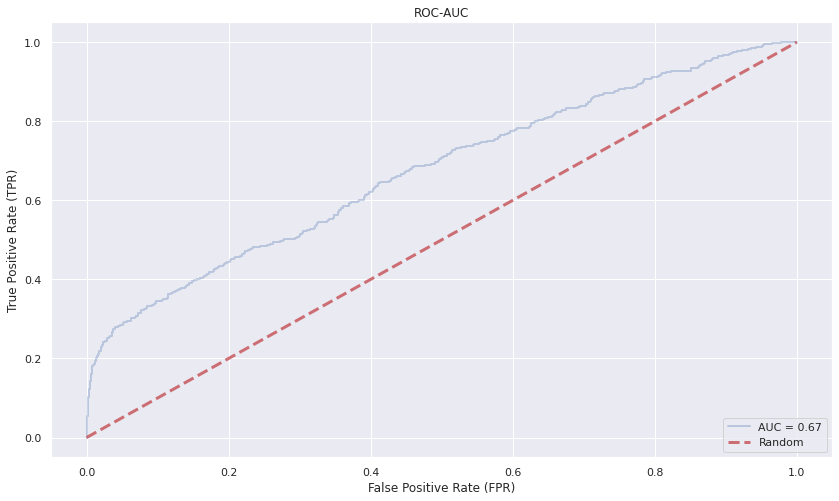

In [16]:
plot_roc_auc(fpr, tpr)

### Stratified K-Fold Validation

In [17]:
def plot_roc_curve(fprs, tprs):
    """
    Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates.
    """
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(18,10))

    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=2, alpha=0.3, label="ROC fold %d (AUC = %0.2f)" % (i, roc_auc))

    # Plot the luck line.
    plt.plot([0,1], [0,1], linestyle='--', lw=3, color='r', label="Random", alpha=.8)

    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=4, alpha=.8)

    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color="grey", alpha=.2, label=r"$\pm$ 1 std. dev.")

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel("False Positive Rate (FPR)")
    ax.set_ylabel("True Positive Rate (TPR)")
    ax.set_title("ROC-AUC")
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)


def compute_roc_auc(model_, index):
    y_predict = model_.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score

In [18]:
cv = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
fprs, tprs, scores = [], [], []

In [19]:
for (train, test), i in zip(cv.split(X, y), range(5)):
    model.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(model, train)
    fpr, tpr, auc_score = compute_roc_auc(model, test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

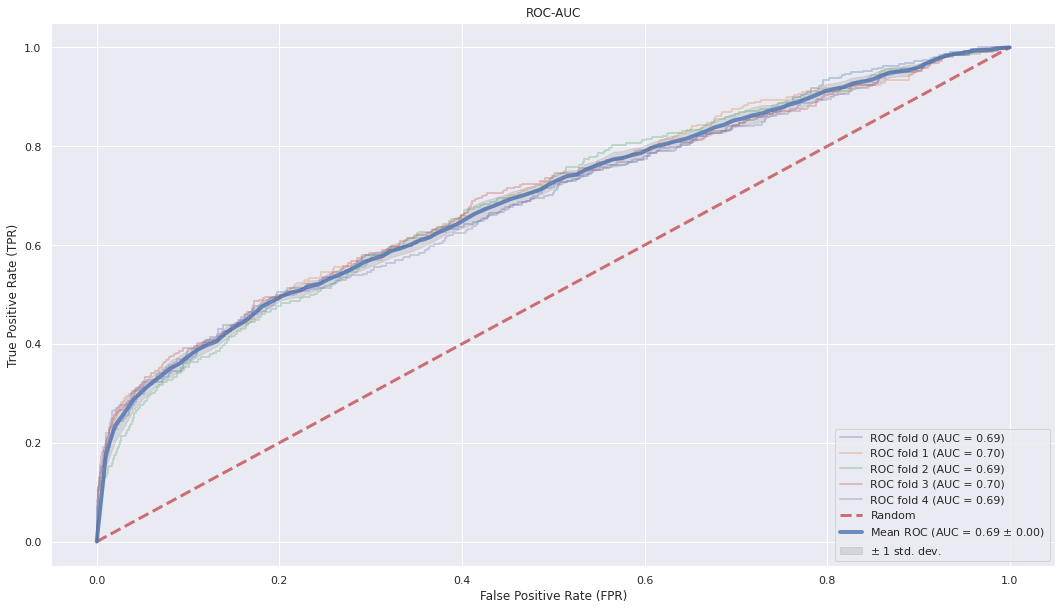

In [20]:
plot_roc_curve(fprs, tprs);

# 4. Model Finetuning

### Randomized Search Cross Validation

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
# Create the random grid
params = {
        'min_child_weight': [i for i in np.arange(1,15,1)],
        'gamma': [i for i in np.arange(0,6,0.5)],
        'subsample': [i for i in np.arange(0,1.1,0.1)],
        'colsample_bytree': [i for i in np.arange(0,1.1,0.1)],
        'max_depth': [i for i in np.arange(1,15,1)],
        'scale_pos_weight':[i for i in np.arange(1,15,1)],
        'learning_rate': [i for i in np.arange(0,0.15,0.01)],
        'n_estimators' : [i for i in np.arange(0,2000,100)]
        }

We will create a new base model.

In [23]:
# Create model
xg = xgb.XGBClassifier(objective='binary:logistic', nthread=1)

In [24]:
# Random search of parameters, using 5
xg_random = RandomizedSearchCV(xg, param_distributions=params, n_iter=1,
                               scoring="roc_auc", n_jobs=4,
                               cv=5, verbose=3, random_state=1001)

# Fit the random search model
xg_random.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    6.0s remaining:    9.0s
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    7.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=1,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale...
                                        'n_estimators': [0, 100, 200, 300, 400,
                                                         500, 600, 700, 800,
                    

In [25]:
best_random = xg_random.best_params_
best_random = {'subsample': 0.8,
               'scale_pos_weight': 1,
               'n_estimators': 1100,
               'min_child_weight': 1,
               'max_depth': 12,
               'learning_rate': 0.01,
               'gamma': 4.0,
               'colsample_bytree': 0.60}

In [26]:
# Create a model with the parameters found
model_random = xgb.XGBClassifier(objective='binary:logistic', nthread=1, **best_random)
fprs, tprs, scores = [], [], []

In [27]:
for (train, test), i in zip(cv.split(X, y), range(5)):
    model_random.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(model_random, train)
    fpr, tpr, auc_score = compute_roc_auc(model_random, test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

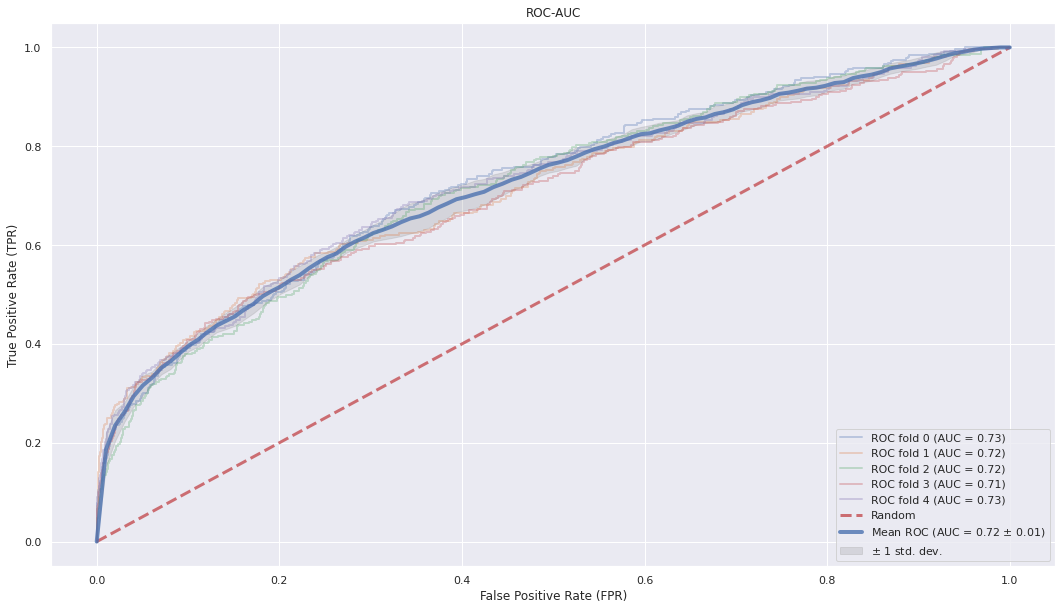

In [28]:
plot_roc_curve(fprs, tprs);

### Grid Search Cross Validation

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# Create the parameter grid based on the results of random search
param_grid = {
              'subsample': [0.7],
              'scale_pos_weight': [1],
              'n_estimators': [1100],
              'min_child_weight': [1],
              'max_depth': [12,13,14],
              'learning_rate': [0.005,0.01],
              'gamma': [4.0],
              'colsample_bytree': [0.6]
             }

In [31]:
# Create model
xg = xgb.XGBClassifier(objective='binary:logistic', nthread=1)

In [32]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring="roc_auc")

In [33]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=1, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_w...ed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6], 'gamma': [4.0],
                         'learning_rate': [0.005, 0.01],
                         'max_depth': [12, 13, 14], 'min_child_we

In [34]:
best_grid = grid_search.best_params_
best_grid

{'colsample_bytree': 0.6,
 'gamma': 4.0,
 'learning_rate': 0.005,
 'max_depth': 12,
 'min_child_weight': 1,
 'n_estimators': 1100,
 'scale_pos_weight': 1,
 'subsample': 0.7}

In [35]:
# Create a model with the parameters found
model_grid = xgb.XGBClassifier(objective='binary:logistic', silent=True, nthread=1, **best_grid)
fprs, tprs, scores = [], [], []

In [36]:
for (train, test), i in zip(cv.split(X, y), range(5)):
    model_grid.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(model_grid, train)
    fpr, tpr, auc_score = compute_roc_auc(model_grid, test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

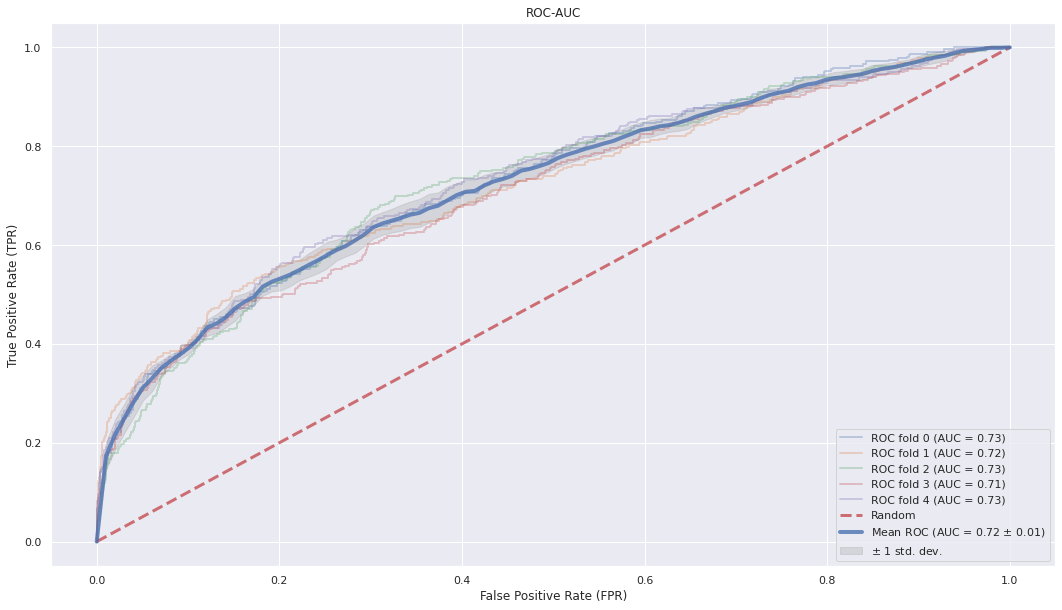

In [37]:
plot_roc_curve(fprs, tprs);

# 5. Understanding the Model

### Feature Importance

One simple way of observing the feature importance is through counting the number of times each feature is split on across all boosting rounds (trees)
in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear

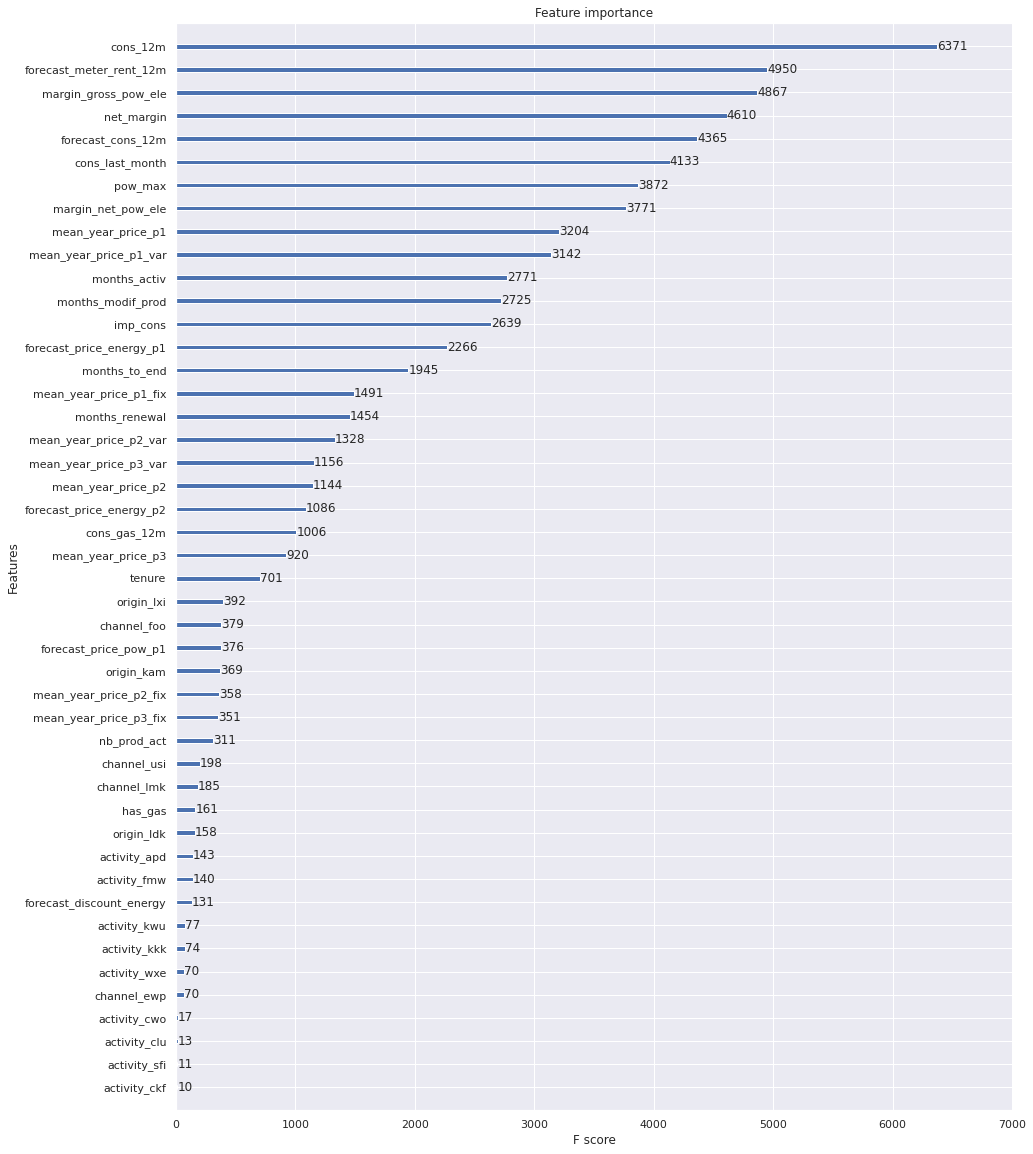

In [38]:
fig, ax = plt.subplots(figsize=(15,20))
xgb.plot_importance(model_grid, ax=ax);

In the feature importance graph above we can see that cons_12m, forecast_meter_rent_12m, margin_gross_pow_ele & net_margin are the features that appear most in our model and we could infer that these 4 features have a significant importance in our model

### Partial Dependence Plot

In [39]:
from sklearn.inspection import plot_partial_dependence

Because currently there is a bug that does not allow us to use our trained model with pandas dataframes, we will create a replica and train it using
numpy arrays

In [40]:
# Create a model with the parameters found
model_grid_v2 = xgb.XGBClassifier(objective='binary:logistic', silent=True, nthread=1, **best_grid)
model_grid_v2.fit(X_train.values, y_train.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=4.0,
              learning_rate=0.005, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=1100, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.7, verbosity=1)

The fig parameter is deprecated in version 0.22 and will be removed in version 0.24


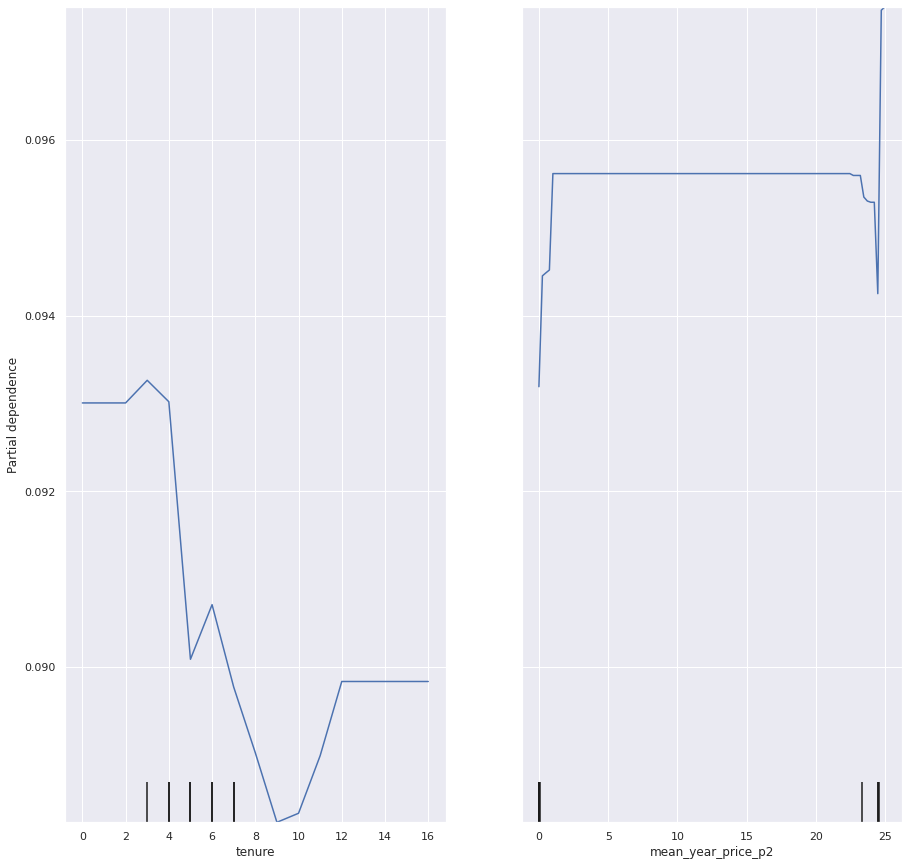

In [41]:
fig = plt.figure(figsize=(15,15))
plot_partial_dependence(model_grid_v2, X_test.values, features=[16,49],
                        feature_names=X_test.columns.tolist(), fig=fig)

Comparing the PDP plots with respect to our previous models, we can see how they are slightly different.

***tenure***: The overall trend is unchanged as compared to our previous models. We can see the trend spikes at slightly different times of the tenure (6y) but then it goes down again and bottoms around 10 years. Then it had started recovering slightly.

***mean_year_price_p2***: In our previous models, we saw a sort of "stairshape", in this case we see the PDP is almost flat with few spikes on the extreme values, which hints us that the variable mean_year_price_p2 is not very relevant in this model.

### SHAP - Feature Importance

In [42]:
explainer = shap.TreeExplainer(model_grid)
shap_values = explainer.shap_values(X_test)

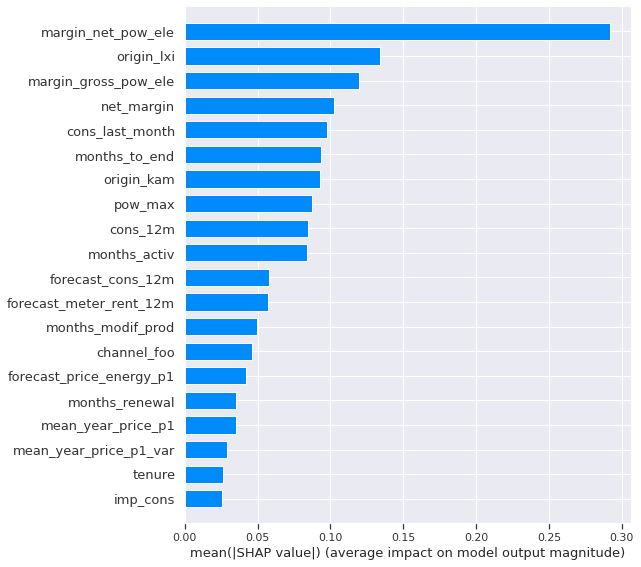

In [43]:
# Feature importance for class 1 - churn
shap.summary_plot(shap_values, X_test, plot_type='bar')

As expected the margin_net_pow_ele is the most important feature by far

### SHAP - Partial Dependence Plot

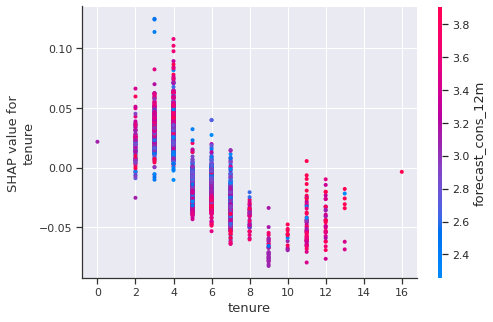

In [44]:
# interaction_index="origin_lxi")
shap.dependence_plot("tenure", shap_values, X_test)

In this case we see a much clearer pattern, in which the longer the tenure the less likely the company is, sort of decreasing linearly until it bottoms
around 9y of tenure. From year 10 of tenure, the churn increases again